# COMPANY BANKRUPTCY PREDICTION

## Objective: 
This notebook aims to develop a predictive model for corporate bankruptcy using financial data from companies listed on the Taiwan Stock Exchange from 1999 to 2009. The objective is to accurately classify companies as either "bankrupt" or "non-bankrupt" based on a set of financial indicators, thereby providing valuable insights for early identification of financial distress. We start with exploratory data analysis and preprocessing to understand the data's structure and address challenges like class imbalance. Logistic regression is selected as our baseline model, offering a clear performance benchmark before experimenting with more advanced modeling techniques.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#display
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 100)



## 1. Data Exploration
Getting to know our dataset.

In [2]:
df = pd.read_csv("data.csv", index_col=False)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

### Summary Statistics
Understanding the statistical summary of the dataset. This provides insights into the central tendency and spread of each numerical feature, including count, mean, standard deviation, minimum, and maximum values.

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

From the summary statistics provided, we can derive several key insights about the dataset's characteristics and potential issues to address:
1. **`Class Imbalance`**: The mean for the `Bankrupt?` column is approximately 0.032, indicating that around 3.2% of the companies in the dataset are bankrupt. This suggests a significant class imbalance, which is common in bankruptcy datasets. We will need to apply resampling techniques or use metrics that handle imbalance, such as precision, recall, and F1 score.

2. **`Feature Ranges and Scales`**: The values in each column vary greatly, with some features ranging up to billions (e.g., Operating Expense Rate, Research and development expense rate) while others are between 0 and 1 (e.g., Current Ratio, Quick Ratio). This wide variation in scales suggests the need for feature scaling, such as normalization or standardization, before feeding the data into a machine learning model. 

3. **`Outliers and Data Distribution`**: Many features have maximum values of 1.0, such as Operating Gross Margin, Realized Sales Gross Margin, and several return-on-asset (ROA) measures. However, some other features have extremely high maximum values, such as Research and development expense rate and Operating Expense Rate. These high values might represent outliers, and handling them could improve model stability and performance. Similarly, several columns have a minimum of 0, and the lower percentiles for some columns are close to zero, suggesting that certain metrics may be zero for some companies, potentially indicating missing information or non-relevant values for those firms.

4. **`Skewness`**: The high standard deviations in some features relative to their means (ex. `Operating Expense Rate`, `Total Asset Growth Rate`) imply substantial variation and likely skewness. Many financial ratios and performance metrics tend to have right-skewed distributions, where a small number of companies have very high values. This could impact model performance, especially if not handled appropriately. So, transformations like logarithmic scaling might reduce skewness.

5. **`Potentially Redundant Features:`** Some features seem to convey similar information, such as multiple variations of profitability ratios (`ROA(C)`, `ROA(A)`, `ROA(B)`, etc.), and liquidity ratios (`Current Ratio`, `Quick Ratio`). We will examine the correlation matrix further toidentify highly correlated features, allowing us to drop or combine some redundant features.

6. **`Feature Scaling and Normalization`**: Given the varied scales of features, we will apply feature scaling methods which will help models converge faster and improve performance. We will try (z-score normalization) or min-max scaling are common choices.

### Exploring Class Balance
Since bankruptcy prediction is often an imbalanced classification problem, we examine the target variable (Bankrupt?) to determine the class distribution.

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


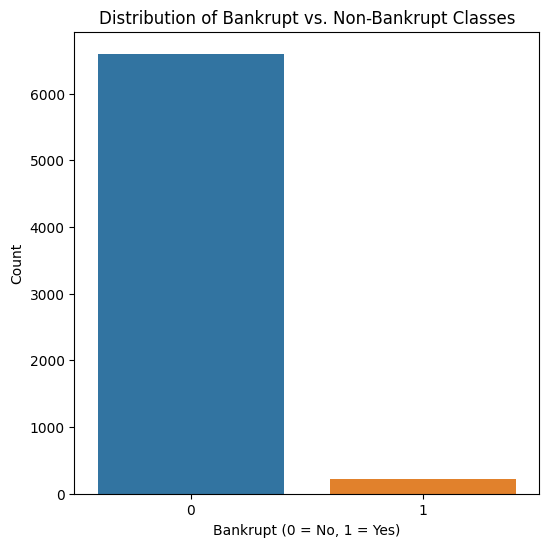

In [6]:
target_distribution = df['Bankrupt?'].value_counts(normalize=True)
print(target_distribution)

#plot to visualize the class distribution of 'Bankrupt?' in the dataset
plt.figure(figsize=(6, 6))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankrupt vs. Non-Bankrupt Classes')
plt.xlabel('Bankrupt (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


The distribution of the target variable, as shown in Figure above, highlights a significant class imbalance in our dataset, where only about 3.2% of companies are labeled as "Bankrupt" (1), while the vast majority (96.8%) are classified as "Non-Bankrupt" (0). This imbalance is typical in bankruptcy prediction datasets, as the occurrence of bankruptcy is relatively rare compared to the number of companies that remain solvent. However, this imbalance poses challenges for our model experimentation, as many standard algorithms tend to favor the majority class, potentially resulting in poor predictive performance for the minority (bankrupt) class.

To address this imbalance, we may employ several techniques to ensure that our model can effectively identify bankrupt companies. Some common approaches include resampling methods, such as oversampling the bankrupt class, undersampling the non-bankrupt class, or using synthetic data generation techniques like Synthetic Minority Over-sampling Technique (SMOTE). Additionally, we may consider using evaluation metrics, such as precision, recall, F1 score, and area under the Precision-Recall curve, which are better suited to imbalanced datasets than overall accuracy. Addressing this imbalance is essential, as the primary goal of our analysis is to accurately predict bankruptcy, a task that inherently requires strong performance on the minority class.

### Correlation matrix: 
to identify relationships between features. This will be used for feature selection, as highly correlated features may not add much predictive power and could lead to multicollinearity issues.

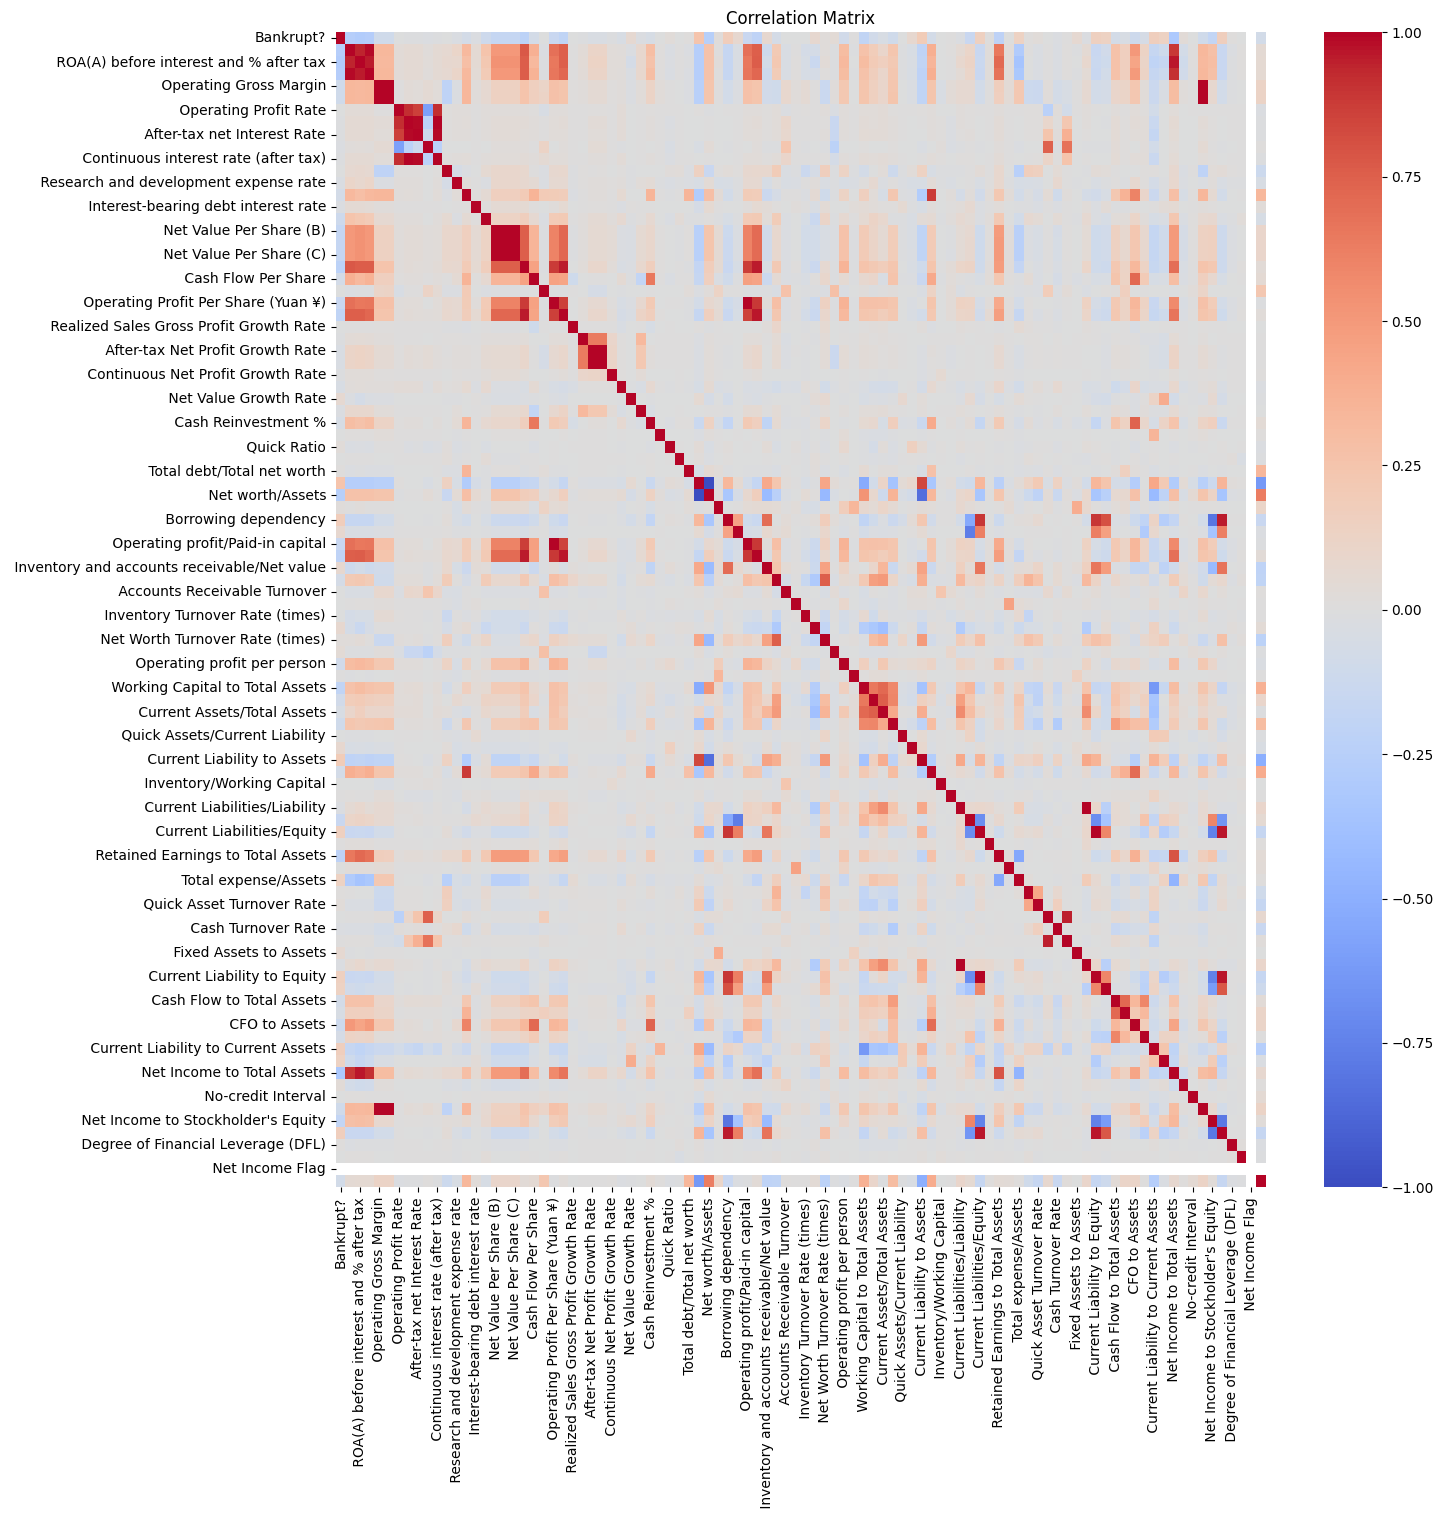

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


The correlation matrix shown above provides a visual representation of the relationships among the features in our dataset. Each cell in the matrix represents the correlation coefficient between a pair of features, with colors ranging from deep red for high positive correlations to deep blue for high negative correlations. Diagonal elements, representing each feature's correlation with itself, naturally exhibit perfect correlation (a value of 1.0). The matrix highlights several instances of strong correlations between features, suggesting potential redundancy in the dataset. For example, metrics like return-on-assets (ROA), different profitability ratios, and other financial performance indicators tend to exhibit moderate to high correlations with each other, as they often capture related financial information about a company.

To improve the model’s efficiency and avoid issues arising from multicollinearity, we plan to exclude features that have a correlation coefficient greater than 0.90 with other features. By removing highly correlated features, we aim to reduce the dimensionality of the dataset, which can mitigate overfitting, enhance interpretability, and potentially improve model performance. This approach will allow us to retain only the most unique and informative features, ensuring that our predictive models are trained on a streamlined, non-redundant feature set.

## 2. Data Preprocessing

### 1. Feature Selection
To improve the model’s efficiency and avoid issues arising from multicollinearity, we exclude features that have a correlation coefficient greater than 0.90 with other features. 

In [8]:
correlation_matrix = df.corr().abs()  # Calculate absolute correlation matrix

# Identify features with correlation greater than 0.90
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Select features that are highly correlated (keeping only one feature from each pair)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

# Drop features with high correlation
df_reduced = df.drop(columns=high_corr_features)

# Convert the reduced DataFrame to a NumPy array
df_reduced_arr = df_reduced.to_numpy()

df_reduced_arr.shape

(6819, 77)

### 2. Data Shuffling
Shuffling will help ensure that each subset (training, validation, and test) has a similar distribution of classes (bankrupt vs. non-bankrupt companies) and other patterns. This is particularly important in our case given we have an imbalanced dataset, where the minority class might be clustered in one part of the data. Shuffling randomizes the data and helps maintain a balanced representation across splits.

In [9]:
#Shuffle the dataset rows
#Setting a seed for reproducibility
df_reduced = df_reduced.sample(frac=1, random_state=42).reset_index(drop=True)

### 3. Define Outcome Features
We define Y as the target column ('Bankrupt?') and X as the feature set (all columns except 'Bankrupt?').

In [10]:
# Optionally, separate features and target if 'Bankrupt?' is your target column
X = df_reduced.drop(columns=['Bankrupt?']).to_numpy()
print(X.shape)

Y = df_reduced['Bankrupt?'].to_numpy()
print(Y.shape)

(6819, 76)
(6819,)


### 4. Data Splitting
Before we proceed to normalization/one-hot encoding, feature selection and engineering, we will split the data sets into training, validation and test data sets. This ensures that the test and validation sets remain truly independent from the training data. It prevents data leakage and maintains real world conditions.

First, we split the data into a training set (60%) and a temporary set (40%) using train_test_split.
Then, we further split the temporary set into validation (20%) and test (20%) sets.

In [11]:
# Split into training (60%) and a temporary set (40%) for validation and test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)

# Further split the temporary set into validation (20%) and test (20%) sets
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Step 6: Verify the shapes of the resulting splits
print("Shapes of the datasets:")
print("X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("X_val:", X_val.shape, "Y_val:", Y_val.shape)
print("X_test:", X_test.shape, "Y_test:", Y_test.shape)

Shapes of the datasets:
X_train: (4091, 76) Y_train: (4091,)
X_val: (1364, 76) Y_val: (1364,)
X_test: (1364, 76) Y_test: (1364,)


### 5. Normalization and Standardization
In our classification task, we standardize the features in X_train, X_val, and X_test to ensure that each feature contributes on a comparable scale, which is particularly beneficial for algorithms that rely on distance or gradient-based optimization, such as logistic regression, neural networks, and support vector machines. Without standardization, features with larger ranges could dominate the learning process, leading the model to prioritize certain features over others, even if they aren’t necessarily more informative. Standardization scales each feature to have a mean of 0 and a standard deviation of 1, which helps the model converge more efficiently and prevents it from being biased towards features with naturally larger values. This also ensures that regularization, if applied, affects each feature equally, enhancing model stability and performance across diverse features.

We do not standardize y_train, y_val, and y_test in a classification task like bankruptcy prediction. In classification problems, the target variable (y) typically consists of categorical labels (e.g., 0 for non-bankrupt and 1 for bankrupt). These labels represent classes rather than continuous values, so standardizing them would not make sense and would interfere with the model’s ability to classify.

In [12]:

# 2. Standardize all features in X_train, X_val, and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data only
scaler.fit(X_train)   # Fit the scaler on the training data to compute mean and std.
X_train_std = scaler.transform(X_train) #standardize training data
X_val_std = scaler.transform(X_val) 
X_test_std = scaler.transform(X_test)

# Output the standardized data for verification (first few rows)
print("Standardized X_train:",X_train_std[:5])
print("Standardized X_val:",X_val_std[:5])
print("Standardized X_test:",X_test_std[:5])


Standardized X_train: [[ 3.82921589e-01 -8.71911482e-02  2.80665227e-02  4.93279384e-03
   1.85998672e+00 -3.83220694e-01  2.58123807e-01  7.03855531e+00
   8.71860327e-01 -2.56370031e-02  9.23394939e-02  1.22780408e-02
  -2.70897621e-02 -2.33744265e-02 -2.60271574e-02 -4.22385369e-03
   7.75063811e-02  3.63731326e-02 -1.66144838e+00 -4.94677613e-02
   2.95926020e-01  2.33430494e-01  1.69405277e-01 -2.94528366e-02
  -2.54756249e-02 -2.63828838e-02 -9.34294699e-01 -1.14349940e-01
  -2.90899558e-01 -4.38368020e-02 -3.43760613e-01 -2.94159638e-01
  -4.72982773e-02 -3.84880625e-02 -6.60138516e-01 -4.09775344e-01
  -3.53184645e-01 -1.56364568e-02 -4.19714989e-02 -4.11318394e-02
   4.13877254e-01  2.76322530e-01 -2.27685692e-01  3.11418505e-01
   2.81574531e-01 -7.29463602e-02 -8.50598499e-01  2.36511031e-01
  -4.15900485e-02 -9.96239076e-02 -3.06486218e-01  6.05938355e-02
  -2.76113108e-01 -1.03242382e-01  3.43555452e-01  7.41605349e-03
  -6.81872566e-01 -4.18655477e-01 -6.28026917e-01  1.7

## Modeling

### 1. Baseline Model
We selected logistic regression as our baseline model due to its simplicity, interpretability, and reliability in binary classification tasks. As a straightforward algorithm, logistic regression provides a solid reference point, allowing us to benchmark performance before moving to more complex models that may address the class imbalance more effectively.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # For ROC-AUC score

# Evaluate the model
classification_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_prob)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)


print(classification_rep)
print(conf_matrix)
print(roc_auc)
print(accuracy)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1307
           1       0.00      0.00      0.00        57

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.92      0.96      0.94      1364

[[1305    2]
 [  57    0]]
0.5369535161545793
0.9567448680351907


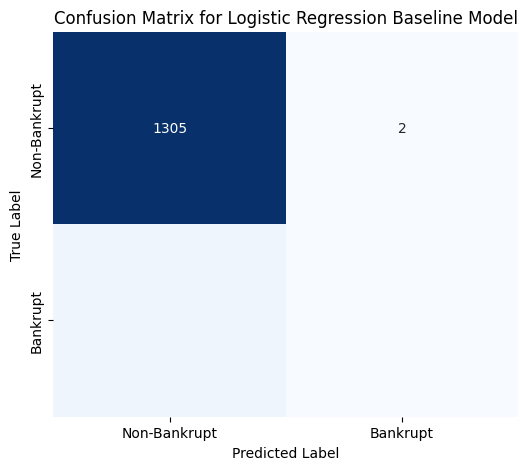

In [14]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Baseline Model")
plt.show()

The confusion matrix for the logistic regression baseline model shows a significant imbalance in the model's predictive capabilities. The model correctly classified 1,305 non-bankrupt companies (true negatives) and only misclassified 2 as bankrupt (false positives), indicating high accuracy for the majority class. However, the model failed to correctly identify any bankrupt companies (0 true positives), misclassifying all 57 actual bankrupt companies as non-bankrupt (false negatives).

This pattern highlights a common issue in highly imbalanced datasets, where the model becomes biased toward the majority class, leading to poor performance on the minority class (bankrupt companies in this case). This results in a high overall accuracy but reveals the model’s inability to detect bankrupt companies, which is the primary focus of this classification task. This indicates that additional techniques, such as class balancing, resampling, or more sophisticated algorithms, are necessary to improve performance on the minority class.

/home/vanel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


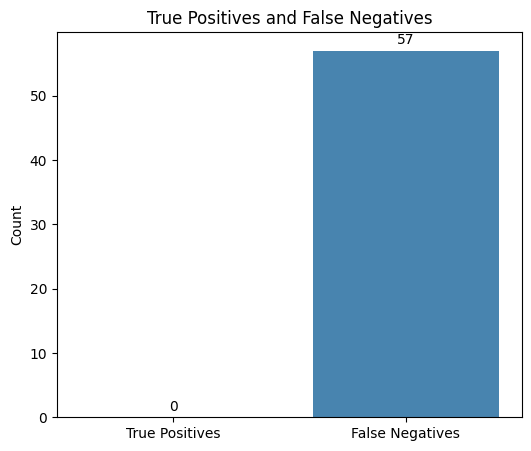

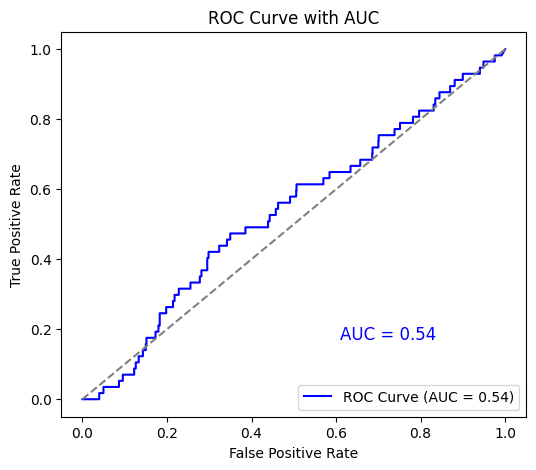

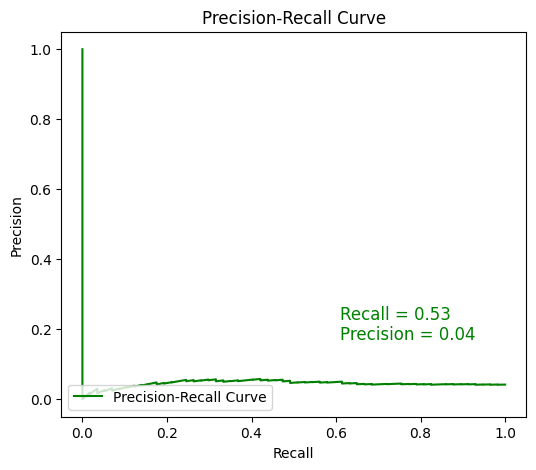

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# True Positives and False Negatives
tp = conf_matrix[1, 1]  # True Positives
fn = conf_matrix[1, 0]  # False Negatives

plt.figure(figsize=(6, 5))
sns.barplot(x=['True Positives', 'False Negatives'], y=[tp, fn], palette='Blues')
plt.ylabel("Count")
plt.title("True Positives and False Negatives")
for index, value in enumerate([tp, fn]):
    plt.text(index, value + 1, str(value), ha='center')
plt.show()

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(Y_test, y_prob)  # y_prob is the probability predictions from logistic regression
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with AUC")
plt.legend(loc="lower right")
plt.annotate(f"AUC = {roc_auc:.2f}", xy=(0.6, 0.2), xycoords="axes fraction", fontsize=12, color="blue")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.annotate(f"Recall = {recall.mean():.2f}\nPrecision = {precision.mean():.2f}", xy=(0.6, 0.2), xycoords="axes fraction", fontsize=12, color="green")
plt.show()


### 2. Random Forest and Sampling
In this second model, we used a Random Forest Classifier to improve our classification of bankrupt companies. Random Forests are an ensemble method that combines multiple decision trees to make more robust predictions. Unlike logistic regression, which relies on a linear decision boundary, Random Forests can capture more complex, non-linear relationships in the data, which can help in identifying bankrupt companies even in an imbalanced dataset.

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  # For ROC-AUC score

# Evaluate the model
classification_rep_rf = classification_report(Y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(Y_test, y_prob_rf)
accuracy_rf = accuracy_score(Y_test, y_pred_rf)

print(classification_rep_rf), 
print(conf_matrix_rf), 
print(roc_auc_rf), 
print(accuracy_rf)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1307
           1       0.73      0.14      0.24        57

    accuracy                           0.96      1364
   macro avg       0.85      0.57      0.61      1364
weighted avg       0.95      0.96      0.95      1364

[[1304    3]
 [  49    8]]
0.9351870494905973
0.9618768328445748


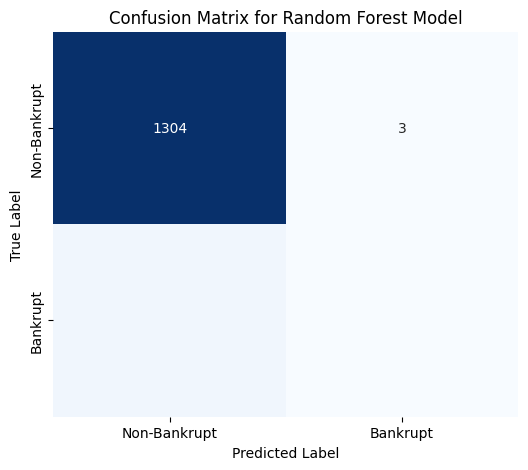

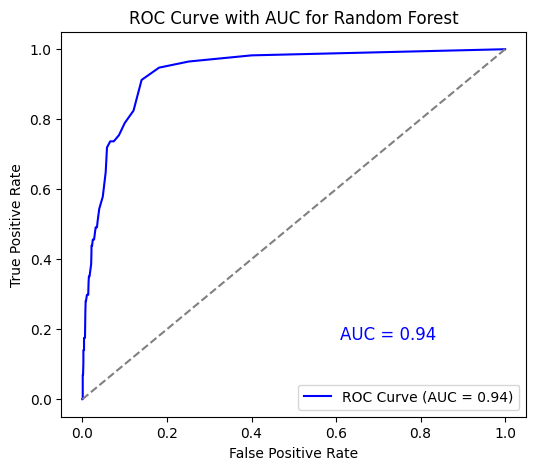

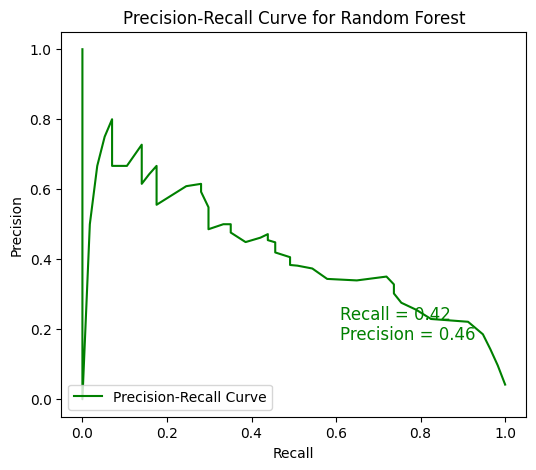

In [17]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

# ROC Curve with AUC
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_prob_rf)  # y_prob_rf is the probability predictions from Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with AUC for Random Forest")
plt.legend(loc="lower right")
plt.annotate(f"AUC = {roc_auc_rf:.2f}", xy=(0.6, 0.2), xycoords="axes fraction", fontsize=12, color="blue")
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(Y_test, y_prob_rf)

plt.figure(figsize=(6, 5))
plt.plot(recall_rf, precision_rf, color='green', label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest")
plt.legend(loc="lower left")
plt.annotate(f"Recall = {recall_rf.mean():.2f}\nPrecision = {precision_rf.mean():.2f}", xy=(0.6, 0.2), xycoords="axes fraction", fontsize=12, color="green")
plt.show()


### 3. XGBOOST
Gradient Boosting methods (e.g., XGBoost, LightGBM) tend to be more flexible and can handle imbalanced data better than Random Forests. These models iteratively improve on misclassified examples, which can help capture patterns in the minority class (bankrupt companies) more effectively.

- XGBoost allows you to set a scale_pos_weight parameter to handle class imbalance, which can be set to the ratio of the majority to minority classes.

In [18]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Set up the scale_pos_weight based on the imbalance ratio
scale_pos_weight = len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1])

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("XGBoost Model Performance")
print(classification_report(Y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob_xgb))
print("Accuracy:", accuracy_score(Y_test, y_pred_xgb))


XGBoost Model Performance
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1307
           1       0.58      0.37      0.45        57

    accuracy                           0.96      1364
   macro avg       0.78      0.68      0.72      1364
weighted avg       0.96      0.96      0.96      1364

Confusion Matrix:
 [[1292   15]
 [  36   21]]
ROC AUC Score: 0.9304353078564813
Accuracy: 0.9626099706744868


### 4. LightGBM with Class Weighting
LightGBM offers a class_weight parameter that can be set to balanced, or you can manually provide class weights.

In [19]:
import lightgbm as lgb

# Define class weights
class_weights = {0: 1, 1: scale_pos_weight}

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight=class_weights)
lgb_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("LightGBM Model Performance")
print(classification_report(Y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_lgb))
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob_lgb))
print("Accuracy:", accuracy_score(Y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 127, number of negative: 3964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18866
[LightGBM] [Info] Number of data points in the train set: 4091, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM Model Performance
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1307
           1       0.69      0.32      0.43        57

    accuracy                           0.97      1364
   macro avg       0.83      0.65      0.71      1364
weighted avg       0.96      0.97      0.96      1364

Confusion Matrix:
 [[1299    8]
 [  39   18]]
ROC AUC Score: 0.9322004322205666
Accuracy: 0.9655425219941349


### 4. Balanced Random Forest 
Use a variation of Random Forest called Balanced Random Forest, which performs balanced resampling in each bootstrap sample to improve minority class focus.

The BalancedRandomForestClassifier is available in the imblearn package, which is specifically designed to handle imbalanced datasets by undersampling the majority class in each bootstrap sample.

In [20]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize and train the Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(random_state=42)
brf_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_brf = brf_model.predict(X_test)
y_prob_brf = brf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Balanced Random Forest Model Performance")
print(classification_report(Y_test, y_pred_brf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_brf))
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob_brf))
print("Accuracy:", accuracy_score(Y_test, y_pred_brf))


/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

Balanced Random Forest Model Performance
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1307
           1       0.21      0.91      0.34        57

    accuracy                           0.85      1364
   macro avg       0.60      0.88      0.63      1364
weighted avg       0.96      0.85      0.89      1364

Confusion Matrix:
 [[1110  197]
 [   5   52]]
ROC AUC Score: 0.9426502369159317
Accuracy: 0.8519061583577713


### Plot of the metrics from the models

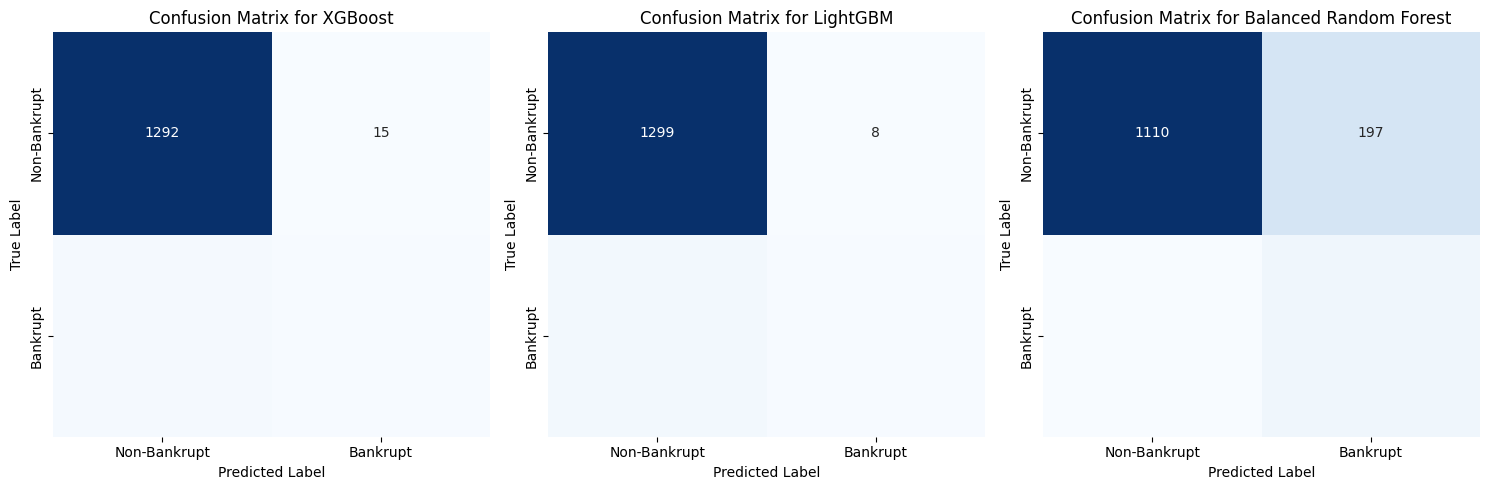

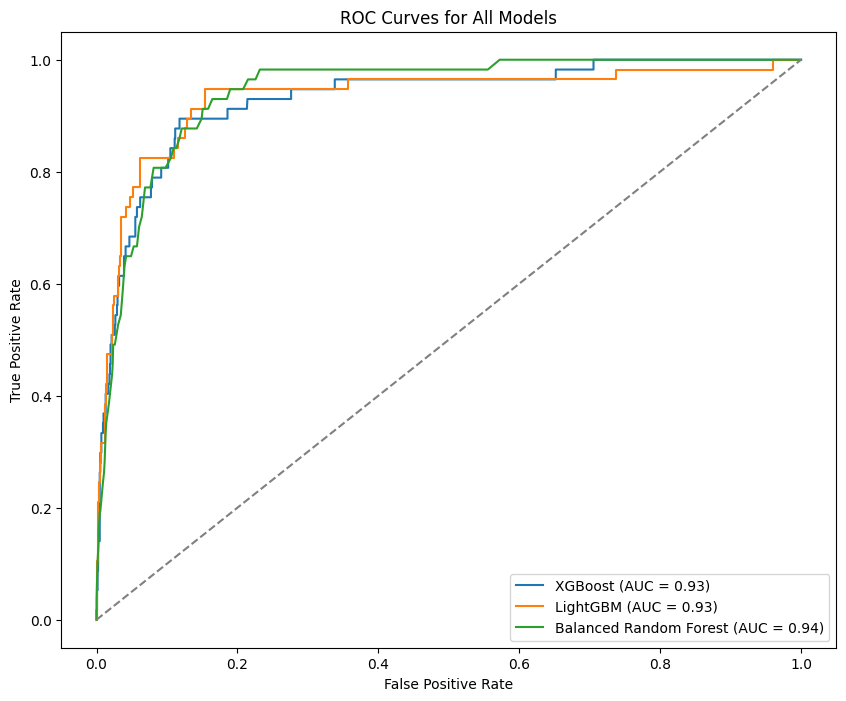

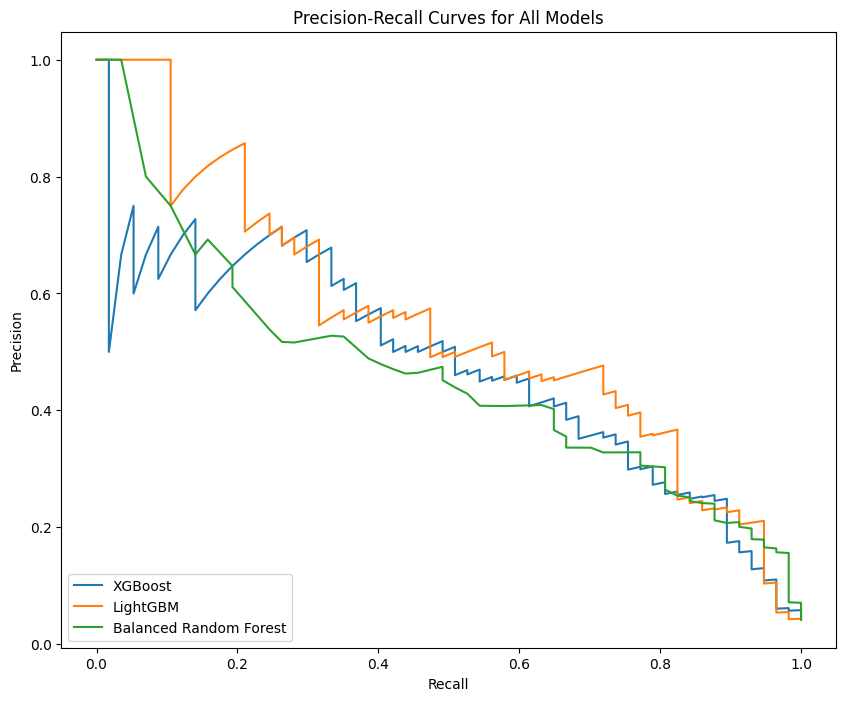

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# List of models and their predicted values and probabilities
models = {
    "XGBoost": (y_pred_xgb, y_prob_xgb),
    "LightGBM": (y_pred_lgb, y_prob_lgb),
    "Balanced Random Forest": (y_pred_brf, y_prob_brf)
}

# Confusion Matrix Plots
plt.figure(figsize=(15, 5))
for i, (model_name, (y_pred, _)) in enumerate(models.items(), 1):
    conf_matrix = confusion_matrix(Y_test, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# ROC Curve Plots
plt.figure(figsize=(10, 8))
for model_name, (_, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve Plots
plt.figure(figsize=(10, 8))
for model_name, (_, y_prob) in models.items():
    precision, recall, _ = precision_recall_curve(Y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for All Models")
plt.legend(loc="lower left")
plt.show()


In [22]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
brf_model = BalancedRandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=brf_model, param_grid=param_grid, scoring='precision', cv=5)
grid_search.fit(X_train, Y_train)

# Best model with tuned parameters
best_brf_model = grid_search.best_estimator_


/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
base_learners = [
    ('brf', BalancedRandomForestClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('lgb', lgb.LGBMClassifier(random_state=42))
]

# Stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacking_model.fit(X_train, Y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test)
y_prob_stack = stacking_model.predict_proba(X_test)[:, 1]

# Evaluate stacked model
print(classification_report(Y_test, y_pred_stack))


/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

[LightGBM] [Info] Number of positive: 127, number of negative: 3964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18866
[LightGBM] [Info] Number of data points in the train set: 4091, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031044 -> initscore=-3.440822
[LightGBM] [Info] Start training from score -3.440822


/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/vanel/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

[LightGBM] [Info] Number of positive: 101, number of negative: 3171
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18868
[LightGBM] [Info] Number of data points in the train set: 3272, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030868 -> initscore=-3.446682
[LightGBM] [Info] Start training from score -3.446682
[LightGBM] [Info] Number of positive: 102, number of negative: 3171
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18867
[LightGBM] [Info] Number of data points in the train set: 3273, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031164 -> initscore=-3.436829
[LightGBM] [Info] Start training from score -3.436829
[LightGBM] [Warnin

Secondary Review

To develop a secondary screening mechanism using the top 10 features from the feature importance analysis, we can create a rules-based or statistical framework that prioritizes flagged cases (predicted bankruptcies) for further review. The mechanism will leverage the insights from the top features to perform additional validation before making a final decision.

Steps to Develop the Mechanism
1. Create Thresholds for Key Features
Set thresholds for the top features that indicate a heightened risk of bankruptcy. These thresholds can be derived from:

Domain expertise (e.g., financial analysts).
Statistical analysis (e.g., percentile-based cutoffs).

In [ ]:
import numpy as np
import pandas as pd

# Define weights for the top 10 features (normalized importance values)
weights = feature_importances['Importance'].head(10).values / feature_importances['Importance'].head(10).sum()

# Extract top 10 features from the dataset
top_features = feature_importances['Feature'].head(10).values
X_val_top_features = pd.DataFrame(X_val, columns=df_reduced.drop(columns=['Bankrupt?']).columns)[top_features]

# Calculate risk scores
risk_scores = np.dot(X_val_top_features, weights)

# Add risk scores to a DataFrame with predictions
flagged_cases = pd.DataFrame({
    'Predicted': y_pred_final,
    'Risk_Score': risk_scores
})

# Only include cases flagged as bankrupt (predicted = 1)
flagged_cases = flagged_cases[flagged_cases['Predicted'] == 1].sort_values(by='Risk_Score', ascending=False)

print("Flagged Cases for Secondary Screening:")
print(flagged_cases.head(10))


In [ ]:
# Set a threshold for secondary review
threshold = np.percentile(risk_scores, 80)

# Filter cases exceeding the threshold
secondary_review_cases = flagged_cases[flagged_cases['Risk_Score'] > threshold]

print("Cases Recommended for Secondary Review:")
print(secondary_review_cases)


4. Perform Secondary Review
For companies flagged by the mechanism:

Conduct manual or semi-automated checks using financial analysts.
Integrate external data sources (e.g., macroeconomic trends, industry reports) for a comprehensive assessment.